In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pathlib

In [3]:
data_dir = './dataset/2_class'

In [4]:
data_root = pathlib.Path(data_dir)

In [5]:
data_root

WindowsPath('dataset/2_class')

In [6]:
for item in data_root.iterdir():
    print(item)

dataset\2_class\airplane
dataset\2_class\lake


In [7]:
all_image_path = list(data_root.glob('*/*'))

In [8]:
len(all_image_path)

1400

In [9]:
all_image_path[:3]

[WindowsPath('dataset/2_class/airplane/airplane_001.jpg'),
 WindowsPath('dataset/2_class/airplane/airplane_002.jpg'),
 WindowsPath('dataset/2_class/airplane/airplane_003.jpg')]

In [10]:
all_image_path[-3:]

[WindowsPath('dataset/2_class/lake/lake_698.jpg'),
 WindowsPath('dataset/2_class/lake/lake_699.jpg'),
 WindowsPath('dataset/2_class/lake/lake_700.jpg')]

In [11]:
all_image_path = [str(path) for path in all_image_path]

In [12]:
all_image_path[0: 12]

['dataset\\2_class\\airplane\\airplane_001.jpg',
 'dataset\\2_class\\airplane\\airplane_002.jpg',
 'dataset\\2_class\\airplane\\airplane_003.jpg',
 'dataset\\2_class\\airplane\\airplane_004.jpg',
 'dataset\\2_class\\airplane\\airplane_005.jpg',
 'dataset\\2_class\\airplane\\airplane_006.jpg',
 'dataset\\2_class\\airplane\\airplane_007.jpg',
 'dataset\\2_class\\airplane\\airplane_008.jpg',
 'dataset\\2_class\\airplane\\airplane_009.jpg',
 'dataset\\2_class\\airplane\\airplane_010.jpg',
 'dataset\\2_class\\airplane\\airplane_011.jpg',
 'dataset\\2_class\\airplane\\airplane_012.jpg']

In [13]:
import random

In [14]:
random.shuffle(all_image_path)

In [15]:
all_image_path[0: 12]

['dataset\\2_class\\airplane\\airplane_512.jpg',
 'dataset\\2_class\\airplane\\airplane_484.jpg',
 'dataset\\2_class\\airplane\\airplane_386.jpg',
 'dataset\\2_class\\lake\\lake_286.jpg',
 'dataset\\2_class\\lake\\lake_205.jpg',
 'dataset\\2_class\\airplane\\airplane_540.jpg',
 'dataset\\2_class\\airplane\\airplane_550.jpg',
 'dataset\\2_class\\airplane\\airplane_164.jpg',
 'dataset\\2_class\\airplane\\airplane_254.jpg',
 'dataset\\2_class\\airplane\\airplane_025.jpg',
 'dataset\\2_class\\airplane\\airplane_130.jpg',
 'dataset\\2_class\\airplane\\airplane_470.jpg']

In [16]:
image_count = len(all_image_path)
image_count

1400

In [17]:
label_names = sorted(item.name for item in data_root.glob('*/'))

In [18]:
label_names

['airplane', 'lake']

In [19]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))

In [20]:
label_to_index

{'airplane': 0, 'lake': 1}

In [21]:
pathlib.Path('dataset\\2_class\\airplane\\airplane_349.jpg').parent.name

'airplane'

In [22]:
all_image_label = [label_to_index[pathlib.Path(p).parent.name] for p in all_image_path]

In [23]:
all_image_label[:5]

[0, 0, 0, 1, 1]

In [24]:
all_image_path[:5]

['dataset\\2_class\\airplane\\airplane_512.jpg',
 'dataset\\2_class\\airplane\\airplane_484.jpg',
 'dataset\\2_class\\airplane\\airplane_386.jpg',
 'dataset\\2_class\\lake\\lake_286.jpg',
 'dataset\\2_class\\lake\\lake_205.jpg']

In [25]:
import IPython.display as display

In [26]:
index_to_label = dict((v, k) for k, v in label_to_index.items())

In [27]:
index_to_label

{0: 'airplane', 1: 'lake'}

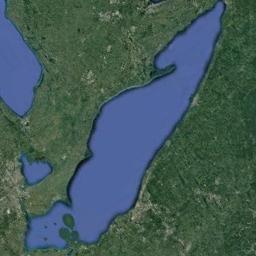

lake



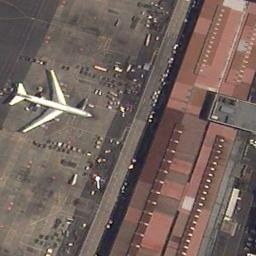

airplane



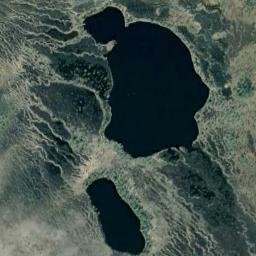

lake



In [28]:
for n in range(3):
    image_index = random.choice(range(len(all_image_path)))
    display.display(display.Image(all_image_path[image_index]))
    print(index_to_label[all_image_label[image_index]])
    print()

In [29]:
img_path = all_image_path[0]

In [30]:
img_path

'dataset\\2_class\\airplane\\airplane_512.jpg'

In [31]:
img_raw = tf.io.read_file(img_path)

In [32]:
img_raw

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc

In [33]:
img_tensor = tf.image.decode_image(img_raw)

In [34]:
img_tensor.shape

TensorShape([256, 256, 3])

In [35]:
img_tensor

<tf.Tensor: shape=(256, 256, 3), dtype=uint8, numpy=
array([[[134, 132, 137],
        [135, 133, 138],
        [135, 133, 136],
        ...,
        [ 73,  64,  67],
        [ 73,  64,  67],
        [ 73,  64,  67]],

       [[134, 132, 137],
        [135, 133, 138],
        [135, 133, 136],
        ...,
        [ 74,  65,  68],
        [ 74,  65,  68],
        [ 73,  64,  67]],

       [[137, 132, 138],
        [137, 132, 138],
        [136, 131, 135],
        ...,
        [ 75,  66,  69],
        [ 75,  66,  69],
        [ 75,  66,  69]],

       ...,

       [[127, 122, 118],
        [122, 117, 113],
        [118, 113, 109],
        ...,
        [ 71,  72,  64],
        [ 71,  72,  64],
        [ 71,  72,  64]],

       [[122, 117, 114],
        [117, 112, 109],
        [114, 109, 106],
        ...,
        [ 70,  71,  65],
        [ 68,  69,  63],
        [ 67,  68,  62]],

       [[118, 113, 110],
        [115, 110, 107],
        [112, 107, 104],
        ...,
        [ 66,  67,  6

In [36]:
img_tensor = tf.cast(img_tensor, tf.float32)

In [37]:
img_tensor = img_tensor / 255

In [38]:
img_tensor.numpy().max()

1.0

In [39]:
img_tensor.numpy().min()

0.0

In [40]:
def load_preprosess_image(img_path):
    img_raw = tf.io.read_file(img_path)
    img_tensor = tf.image.decode_jpeg(img_raw, channels = 3)
    img_tensor = tf.image.resize(img_tensor, [256, 256])
    img_tensor = tf.cast(img_tensor, tf.float32)
    img = img_tensor / 255
    return img

In [41]:
image_temp_path = all_image_path[100]

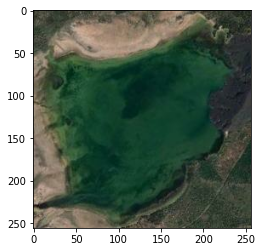

In [42]:
plt.imshow(load_preprosess_image(image_temp_path))

In [43]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_path)

In [44]:
path_ds

<TensorSliceDataset shapes: (), types: tf.string>

In [45]:
image_dataset = path_ds.map(load_preprosess_image)

In [46]:
label_dataset = tf.data.Dataset.from_tensor_slices(all_image_label)

In [47]:
for label in label_dataset.take(10):
    print(label.numpy())

0
0
0
1
1
0
0
0
0
0


In [48]:
for img in image_dataset.take(1):
    print(img.numpy())

[[[0.5254902  0.5176471  0.5372549 ]
  [0.5294118  0.52156866 0.5411765 ]
  [0.5294118  0.52156866 0.53333336]
  ...
  [0.28627452 0.2509804  0.2627451 ]
  [0.28627452 0.2509804  0.2627451 ]
  [0.28627452 0.2509804  0.2627451 ]]

 [[0.5254902  0.5176471  0.5372549 ]
  [0.5294118  0.52156866 0.5411765 ]
  [0.5294118  0.52156866 0.53333336]
  ...
  [0.2901961  0.25490198 0.26666668]
  [0.2901961  0.25490198 0.26666668]
  [0.28627452 0.2509804  0.2627451 ]]

 [[0.5372549  0.5176471  0.5411765 ]
  [0.5372549  0.5176471  0.5411765 ]
  [0.53333336 0.5137255  0.5294118 ]
  ...
  [0.29411766 0.25882354 0.27058825]
  [0.29411766 0.25882354 0.27058825]
  [0.29411766 0.25882354 0.27058825]]

 ...

 [[0.49803922 0.47843137 0.4627451 ]
  [0.47843137 0.45882353 0.44313726]
  [0.4627451  0.44313726 0.42745098]
  ...
  [0.2784314  0.28235295 0.2509804 ]
  [0.2784314  0.28235295 0.2509804 ]
  [0.2784314  0.28235295 0.2509804 ]]

 [[0.47843137 0.45882353 0.44705883]
  [0.45882353 0.4392157  0.42745098]


In [49]:
image_dataset

<MapDataset shapes: (256, 256, 3), types: tf.float32>

In [50]:
dataset = tf.data.Dataset.zip((image_dataset, label_dataset))

In [51]:
dataset

<ZipDataset shapes: ((256, 256, 3), ()), types: (tf.float32, tf.int32)>

In [52]:
#划分测试数据和训练数据

In [53]:
test_count = int(image_count * 0.2)
train_count = image_count - test_count

In [54]:
test_count, train_count

(280, 1120)

In [55]:
train_dataset = dataset.skip(test_count)

In [56]:
test_dataset = dataset.take(test_count)

In [57]:
BATCH_SIZE = 32

In [58]:
train_dataset = train_dataset.repeat().shuffle(buffer_size = train_count).batch(BATCH_SIZE)

In [59]:
test_dataset = test_dataset.batch(BATCH_SIZE)

In [60]:
'''
#增加批标准化优化方法层
model = tf.keras.Sequential()  #顺序模型
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape = (256, 256, 3), padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))
          
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(256, (3, 3), padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(256, (3, 3), padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(1024, (3, 3), padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(256))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
'''

"\n#增加批标准化优化方法层\nmodel = tf.keras.Sequential()  #顺序模型\nmodel.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape = (256, 256, 3), padding = 'same'))\nmodel.add(tf.keras.layers.BatchNormalization())\nmodel.add(tf.keras.layers.Activation('relu'))\nmodel.add(tf.keras.layers.Dropout(0.5))\n          \nmodel.add(tf.keras.layers.Conv2D(64, (3, 3), padding = 'same'))\nmodel.add(tf.keras.layers.BatchNormalization())\nmodel.add(tf.keras.layers.Activation('relu'))\nmodel.add(tf.keras.layers.Dropout(0.5))\n\nmodel.add(tf.keras.layers.MaxPooling2D())\nmodel.add(tf.keras.layers.Conv2D(128, (3, 3), padding = 'same'))\nmodel.add(tf.keras.layers.BatchNormalization())\nmodel.add(tf.keras.layers.Activation('relu'))\nmodel.add(tf.keras.layers.Dropout(0.5))\n\nmodel.add(tf.keras.layers.MaxPooling2D())\nmodel.add(tf.keras.layers.Conv2D(128, (3, 3), padding = 'same'))\nmodel.add(tf.keras.layers.BatchNormalization())\nmodel.add(tf.keras.layers.Activation('relu'))\nmodel.add(tf.keras.layers.Dropout(0.5))\n\nmo

In [61]:

model = tf.keras.Sequential()  #顺序模型
model.add(tf.keras.layers.Conv2D(64, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu'))
#model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(512, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())
model.add(tf.keras.layers.Conv2D(1024, (3, 3), activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024, activation = 'relu'))
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))


In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 256)       2

In [63]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [64]:
steps_per_epoch = train_count//BATCH_SIZE
validation_steps = test_count//BATCH_SIZE

In [65]:
history = model.fit(train_dataset, 
                    epochs= 30,
                    steps_per_epoch = steps_per_epoch,
                    validation_data = test_dataset,
                    validation_steps = validation_steps)

Train for 35 steps, validate for 8 steps
Epoch 1/30
35/35 [==============================] - 36s 1s/step - loss: 0.6540 - acc: 0.5893 - val_loss: 0.4359 - val_acc: 0.7617
Epoch 2/30
35/35 [==============================] - 10s 298ms/step - loss: 0.3753 - acc: 0.8705 - val_loss: 1.2050 - val_acc: 0.8086
Epoch 3/30
35/35 [==============================] - 10s 295ms/step - loss: 0.4375 - acc: 0.8643 - val_loss: 0.2531 - val_acc: 0.9414
Epoch 4/30
35/35 [==============================] - 10s 300ms/step - loss: 0.1459 - acc: 0.9670 - val_loss: 0.1470 - val_acc: 0.9453
Epoch 5/30
35/35 [==============================] - 11s 322ms/step - loss: 0.1757 - acc: 0.9366 - val_loss: 0.1162 - val_acc: 0.9570
Epoch 6/30
35/35 [==============================] - 12s 348ms/step - loss: 0.1768 - acc: 0.9455 - val_loss: 0.1483 - val_acc: 0.9688
Epoch 7/30
35/35 [==============================] - 12s 350ms/step - loss: 0.1367 - acc: 0.9589 - val_loss: 0.0924 - val_acc: 0.9688
Epoch 8/30
35/35 [=============

In [66]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

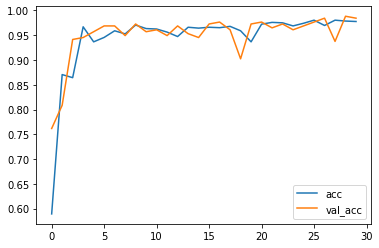

In [67]:
plt.plot(history.epoch, history.history.get('acc'), label = 'acc')
plt.plot(history.epoch, history.history.get('val_acc'), label = 'val_acc')
plt.legend()

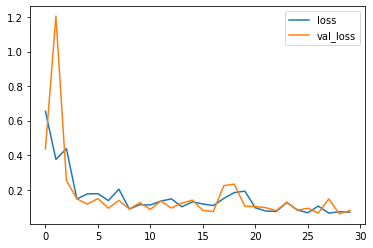

In [68]:
plt.plot(history.epoch, history.history.get('loss'), label = 'loss')
plt.plot(history.epoch, history.history.get('val_loss'), label = 'val_loss')
plt.legend()

In [69]:
test_loss, test_acc = model.evaluate(test_dataset, verbose = 2)
print('\n Test accuracy:', test_acc)

9/9 - 2s - loss: 0.0753 - acc: 0.9821

 Test accuracy: 0.98214287


In [70]:
predict = model.predict(test_dataset)

In [71]:
test_dataset

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

# 保存模型

In [74]:
# 1.保存整个模型(包含：权重、配置（架构）、优化器)
model.save('E:/TF_project/learn/model/two_class.h5')

In [75]:
new_model = tf.keras.models.load_model('E:/TF_project/learn/model/two_class.h5')

In [76]:
new_model.evaluate(test_dataset)

9/9 [==============================] - 1s 116ms/step - loss: 0.0753 - acc: 0.9821


[0.07530602305713627, 0.98214287]

In [91]:
# 2.仅保存架构（不保存权重、优化器）
json_config = model.to_json()

In [92]:
reinitialized_model = tf.keras.models.model_from_json(json_config)

In [93]:
reinitialized_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 122, 122, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 256)       2

In [94]:
reinitialized_model.compile(optimizer = 'adam',
                            loss = 'binary_crossentropy',
                            metrics = ['acc'])

In [95]:
reinitialized_model.evaluate(test_dataset)

9/9 [==============================] - 1s 112ms/step - loss: 0.6937 - acc: 0.4857


[0.6937317053476969, 0.4857143]

In [96]:
# 3.仅保存权重
weights = model.get_weights()
reinitialized_model.set_weights(weights)

In [97]:
model.save_weights('E:/TF_project/learn/model/two_class_weights.h5')

In [98]:
reinitialized_model.evaluate(test_dataset)

9/9 [==============================] - 1s 103ms/step - loss: 0.0753 - acc: 0.9821


[0.07530602305713627, 0.98214287]

# 在训练期间保存检查点

In [99]:
checkpoint_path = './training_checkpoint/two_class.cpkt'

In [100]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only = True)

In [110]:
reinitialized_model = tf.keras.Sequential()
reinitialized_model.add(tf.keras.layers.Flatten(input_shape = (256, 256, 3)))
reinitialized_model.add(tf.keras.layers.Dense(128, activation = 'relu'))
reinitialized_model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [111]:
reinitialized_model.compile(optimizer = 'adam',
                            loss = 'sparse_categorical_crossentropy',
                            metrics = ['acc'])

In [112]:
reinitialized_model.evaluate(test_dataset)

9/9 [==============================] - 0s 47ms/step - loss: nan - acc: 0.4643


[nan, 0.4642857]

In [106]:
reinitialized_model.fit(train_dataset, 
                        epochs= 3,
                        steps_per_epoch = steps_per_epoch,
                        validation_data = test_dataset,
                        validation_steps = validation_steps,
                        callbacks = [cp_callback])

Train for 35 steps, validate for 8 steps
Epoch 1/3
35/35 [==============================] - 6s 179ms/step - loss: nan - acc: 0.4991 - val_loss: nan - val_acc: 0.5234
Epoch 2/3
35/35 [==============================] - 4s 119ms/step - loss: nan - acc: 0.5152 - val_loss: nan - val_acc: 0.5234
Epoch 3/3
35/35 [==============================] - 4s 116ms/step - loss: nan - acc: 0.4714 - val_loss: nan - val_acc: 0.5234


In [113]:
reinitialized_model.load_weights(checkpoint_path)

In [114]:
reinitialized_model.evaluate(test_dataset)

9/9 [==============================] - 0s 40ms/step - loss: nan - acc: 0.5143


[nan, 0.51428574]